In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines import CoxTimeVaryingFitter

# Read Data

In [3]:
#Define path
path=r"C:\Users\fdiazgonzalezmanja\Documents\MBD_courses\Credit_Scoring\Individual_project\Assignment_Data_2023"

In [5]:
#Read data
mor = pd.read_csv(path+r"\mortgage.csv")

# Data exploration

In [7]:
mor.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0


In [45]:
mor.describe()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
count,622219.000000,622219.000000,622219.000000,622219.000000,622219.000000,6.222190e+05,622219.000000,622219.000000,622219.000000,622219.000000,...,622219.000000,622219.000000,6.222190e+05,622219.000000,622219.000000,622219.000000,622219.000000,622219.000000,622219.000000,622219.000000
mean,25141.021848,35.799309,20.576450,24.606801,137.213671,2.460523e+05,83.078239,6.700836,184.102317,1.381058,...,0.611904,0.138286,2.563651e+05,673.668734,78.976433,5.650538,198.148398,0.024353,0.042721,0.109796
std,13749.623014,11.580002,7.610427,6.739667,19.530448,2.141613e+05,24.968839,2.077520,27.650825,1.964707,...,0.487317,0.345200,2.197009e+05,71.690396,10.127634,2.976440,33.934437,0.154143,0.202228,0.427999
min,1.000000,1.000000,-40.000000,1.000000,18.000000,0.000000e+00,0.000000,0.000000,107.830000,-4.146711,...,0.000000,0.000000,4.791500e+03,400.000000,50.100000,0.000000,75.710000,0.000000,0.000000,0.000000
25%,13577.000000,27.000000,18.000000,21.000000,137.000000,1.021175e+05,67.109446,5.650000,158.600000,1.104163,...,0.000000,0.000000,1.080000e+05,626.000000,75.000000,5.000000,179.450000,0.000000,0.000000,0.000000
50%,24873.000000,34.000000,22.000000,25.000000,142.000000,1.807573e+05,82.253269,6.625000,180.520000,1.850689,...,1.000000,0.000000,1.880000e+05,678.000000,80.000000,6.290000,216.770000,0.000000,0.000000,0.000000
75%,37038.000000,44.000000,25.000000,28.000000,145.000000,3.375570e+05,100.634381,7.875000,212.730000,2.694111,...,1.000000,0.000000,3.520000e+05,729.000000,80.000000,7.451500,222.390000,0.000000,0.000000,0.000000
max,50000.000000,60.000000,60.000000,60.000000,229.000000,8.701859e+06,803.513550,37.500000,226.290000,5.132464,...,1.000000,1.000000,8.000000e+06,840.000000,218.500000,19.750000,226.290000,1.000000,1.000000,2.000000


In [13]:
mor.isna().sum()

id                         0
time                       0
orig_time                  0
first_time                 0
mat_time                   0
balance_time               0
LTV_time                   0
interest_rate_time         0
hpi_time                   0
gdp_time                   0
uer_time                   0
REtype_CO_orig_time        0
REtype_PU_orig_time        0
REtype_SF_orig_time        0
investor_orig_time         0
balance_orig_time          0
FICO_orig_time             0
LTV_orig_time              0
Interest_Rate_orig_time    0
hpi_orig_time              0
default_time               0
payoff_time                0
status_time                0
dtype: int64

In [12]:
#Simple imputation of null values
mor = mor.dropna()

# Question 1

Evaluate whether the time to default for borrowers with low outstanding balance at origination time (30% quantile), significantly differs from borrowers with Average/High outstanding balance at origination time. Display and compare the probability of survival after 25/50 months for the two groups

In order to answer these question, we will convert first the data to static format, as for now it is in episodic format

In [39]:
# convert episodic data to static
mor_static = mor.groupby("id").agg(np.max).reset_index()

We will then get the id of the people that have a low outstanding balance and average/high balance at origination time

In [67]:
thirty_q=mor_static['balance_orig_time'].quantile(0.3)
low_out=mor_static.loc[mor_static['balance_orig_time']<=thirty_q,'id'].values
high_out=mor_static.loc[mor_static['balance_orig_time']>thirty_q,'id'].values

We will now use the Kaplain Meier method to compute the probabilities of default for each of the groups

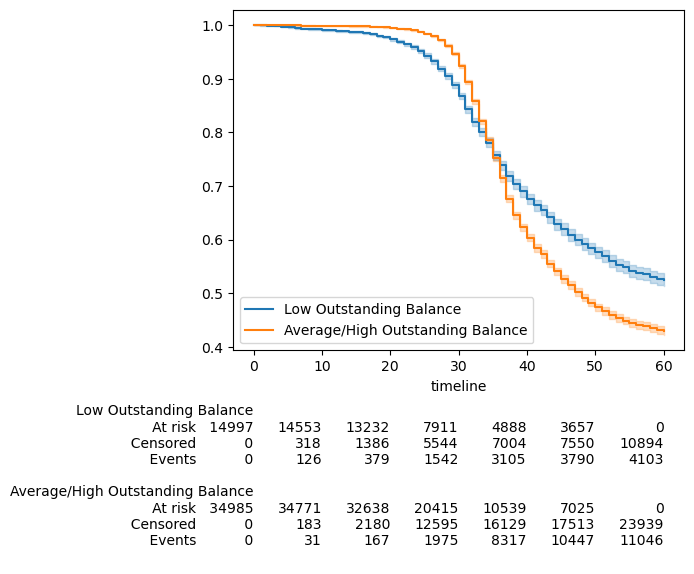

In [69]:
# Compare two groups

kmf1 = KaplanMeierFitter()
kmf2 = KaplanMeierFitter()

fig, ax = plt.subplots(1,1 , figsize=(7,6))

# subset data
df1 = mor_static.loc[mor_static["id"].isin(low_out),:]
df2 = mor_static.loc[mor_static["id"].isin(high_out),:]

# fit subset low_out
ax = kmf1.fit(df1['time'], df1['default_time'], label='Low Outstanding Balance').plot_survival_function(ax=ax)

# fit subset average/high out
ax = kmf2.fit(df2['time'], df2['default_time'], label='Average/High Outstanding Balance').plot_survival_function(ax=ax)

from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf1, kmf2, ax=ax)
plt.tight_layout()

We can see that both graphs differ on the probability of survival, indeed the average outstanding balance in the begining if the timelien are more likely to survive (not default) than the other group. Nevertheless at a certain point the contrary happens, we will illustrate a little bit more into detail below

We can also perform a longrank test to assess wether there is a difference between the two groups

In [70]:
# Perform logrank test to assess whether there is a difference between the two groups

# Null-Hypothesis: No difference between the two groups
res = logrank_test(df1['time'], df2['time'], event_observed_A=df1['default_time'],event_observed_B=df2['default_time'])

# We can reject the Null-Hypothesis (p < 0.05)
res.summary 

,test_statistic,p,-log2(p)
0,58.864966,1.688724e-14,45.751059


Indeed there is a difference between the two groups, so the probability of defaulting is quite different

We will now compare the probability of both groups after time 25 and after time 50 and will discuss the results

In [71]:
#Create dictionary to save the km objects
km_objects={'low_out':kmf1,'high_out':kmf2}

#Create lists for df
group = []
prob_25= []
prob_50 = []

for key, kmf in km_objects.items():
    
    #Append the name
    group.append(key)

    #Probability of survival at time 25
    prob_25.append(round(kmf.predict(25),2))

    #Probability of survival at time 50
    prob_50.append(round(kmf.predict(50),2))

#Create dictionary to display df 
data = {
'Group': group,
'Prob of survival (25)': prob_25,
'Prob of survival (50)': prob_50
}

#Create df
result_df = pd.DataFrame(data)

result_df

,Group,Prob of survival (25),Prob of survival (50)
0,low_out,0.94,0.58
1,high_out,0.98,0.47


As we can see above the probability of survival for the people that have a little amount to pay on their loan at the origin are actually less probable to survive than the ones that have more money still to pay. Nevertheless, as time goes by the probability of the ones having low amount of money to pay at the origin is higher than the one of thos having more amount of money to pay

# Question 2

Fix a Cox Proportional Hazard model using the variables in the following list

In [82]:
vars_select=['id','first_time','mat_time','default_time','hpi_time','gdp_time','uer_time','balance_time','interest_rate_time','FICO_orig_time','LTV_time']

In [85]:
# Note: credit_tv contains both time varying and static variables 
ctv = CoxTimeVaryingFitter()
ctv.fit(mor[vars_select], id_col="id", event_col="default_time", start_col="first_time", stop_col="mat_time", show_progress=True)
ctv.summary

Iteration 1: norm_delta = 0.64031, step_size = 0.95000, ll = -183313.39822, newton_decrement = 2706.78806, seconds_since_start = 16.7
Iteration 2: norm_delta = 0.07098, step_size = 0.95000, ll = -180755.42760, newton_decrement = 18.33559, seconds_since_start = 33.2
Iteration 3: norm_delta = 0.00509, step_size = 0.95000, ll = -180736.84608, newton_decrement = 0.13280, seconds_since_start = 49.8
Iteration 4: norm_delta = 0.00029, step_size = 1.00000, ll = -180736.71305, newton_decrement = 0.00043, seconds_since_start = 67.1
Iteration 5: norm_delta = 0.00000, step_size = 1.00000, ll = -180736.71261, newton_decrement = 0.00000, seconds_since_start = 83.3
Convergence completed after 5 iterations.


,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
hpi_time,-8.850573e-03,0.991188,7.242741e-04,-1.027012e-02,-7.431022e-03,0.989782,0.992597,0.0,-12.219923,2.433164e-34,111.662721
gdp_time,-6.923764e-02,0.933105,4.328809e-03,-7.772194e-02,-6.075333e-02,0.925222,0.941055,0.0,-15.994616,1.393153e-57,188.871547
uer_time,-4.687421e-02,0.954207,7.897948e-03,-6.235390e-02,-3.139452e-02,0.939550,0.969093,0.0,-5.934986,2.938698e-09,28.342176
balance_time,-2.508928e-07,1.000000,4.289512e-08,-3.349657e-07,-1.668200e-07,1.000000,1.000000,0.0,-5.848984,4.945844e-09,27.591136
interest_rate_time,1.842658e-01,1.202335,3.433819e-03,1.775356e-01,1.909959e-01,1.194271,1.210455,0.0,53.662060,0.000000e+00,inf
FICO_orig_time,-3.435839e-03,0.996570,1.226859e-04,-3.676299e-03,-3.195379e-03,0.996330,0.996810,0.0,-28.005158,1.406010e-172,570.880025
LTV_time,-8.786297e-03,0.991252,4.912724e-04,-9.749173e-03,-7.823421e-03,0.990298,0.992207,0.0,-17.884775,1.549763e-71,235.224848


After we have trained the model, we will get the p-values of each of the parameters to see if they are significant

In [86]:
# inspect p-values
round(ctv.summary['p'], 4)

covariate
hpi_time              0.0
gdp_time              0.0
uer_time              0.0
balance_time          0.0
interest_rate_time    0.0
FICO_orig_time        0.0
LTV_time              0.0
Name: p, dtype: float64

# Question 3

Interpret the results of the model

As we can see all the p-values are significant, thus we will stay with these values

<AxesSubplot:xlabel='log(HR) (95% CI)'>

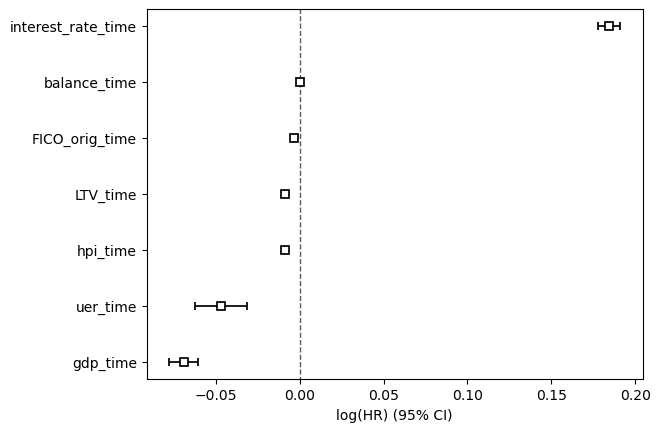

In [87]:
ctv.plot()

In [89]:
# print parameter values
print(round(ctv.params_, 6))

covariate
hpi_time             -0.008851
gdp_time             -0.069238
uer_time             -0.046874
balance_time         -0.000000
interest_rate_time    0.184266
FICO_orig_time       -0.003436
LTV_time             -0.008786
dtype: float64


The interpretation for the coefficients shown above is the following:

An increase in a unit (1%) of interest rate (in the future) will increase the log odds of default by 0.18, the more interest rate (in the future), the more probability of default.

For the balance varaible, there is no evident impact on the log odds of default

For the rest of the variables the impact is negative, which means an increase on the FICO score at origin actually decreases the log odds by 0.003, thus, the FICO score actually decreases the probability of default